In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

# Read and Plot Data

In [31]:
data = pd.read_csv("dbscan_db/Clustering_gmm.csv")

In [32]:
df = pd.DataFrame(data)
df_np = df.to_numpy()
np.shape(df_np)

(500, 2)

In [33]:
x = df["Weight"]
y = df["Height"]

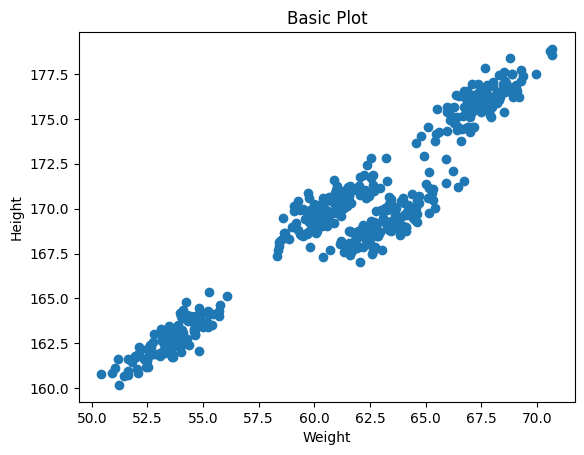

In [34]:
plt.scatter(df_np[:,0],df_np[:,1])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Basic Plot")
plt.show()

## Plot Function

In [35]:
def plotClusters(model):
    global db_np
    labels = model.labels_

    #Extract the number of Clusters and Outliers
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print("Number of Clusters = ", n_clusters_)
    print("Number of Outliers = ", n_noise_)

    #Plot the Clusters
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = df_np[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = df_np[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.show()

# Models

## Model 1
### epsilon = 0.3 ; min_samples = 10

In [36]:
model1 = DBSCAN(eps=0.3, min_samples=10).fit(df_np)

Number of Clusters =  6
Number of Outliers =  376


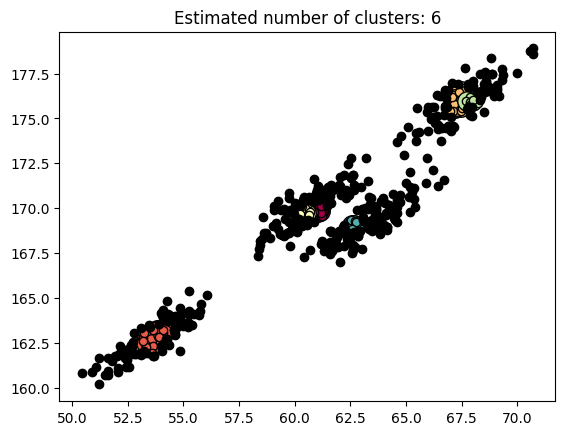

In [37]:
plotClusters(model1)

#### Inference:
1. The distance (epsilon) seems to be too small. The points need to be very close to each other to be clustered correctly.
2. The min_sample is too large. This affects the ability of a point to be considered a core point.

---

## Model 2
### epsilon = 0. ; min_samples = 10

In [65]:
model2 = DBSCAN(eps=0.5, min_samples=10).fit(df_np)

Number of Clusters =  5
Number of Outliers =  115


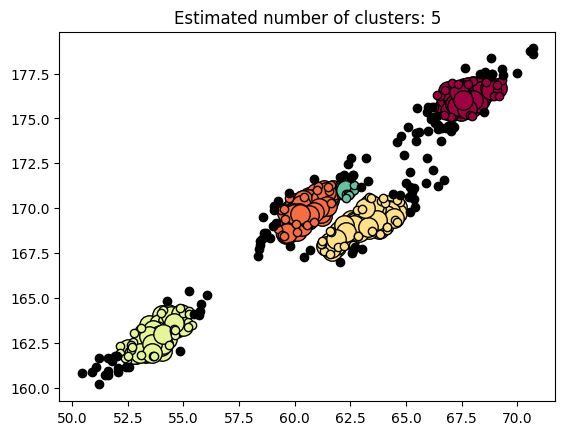

In [66]:
plotClusters(model2)

#### Inference:
1. You can see the immediate difference in the plot. The number of clusters have reduced and the cluster sizes are also bigger.

----

## Model3
### epsilon = 0.3 ; min_samples = 5

In [41]:
model3 = DBSCAN(eps=0.3, min_samples=5).fit(df_np)

Number of Clusters =  16
Number of Outliers =  169


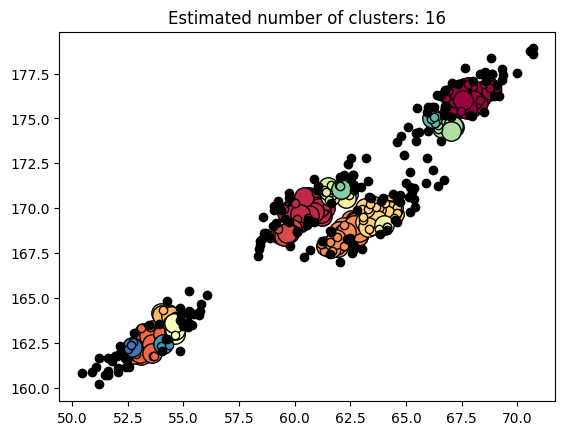

In [42]:
plotClusters(model3)

#### Inference:
1. Because the distance is still low, the sizes of the clusters are small.
2. Due to the lower min_sample number, you can see more clusters.

---

## Model 4
### epsilon = 0.3 ; min_samples = 15

In [43]:
model4 = DBSCAN(eps=0.3, min_samples=15).fit(df_np)

Number of Clusters =  1
Number of Outliers =  485


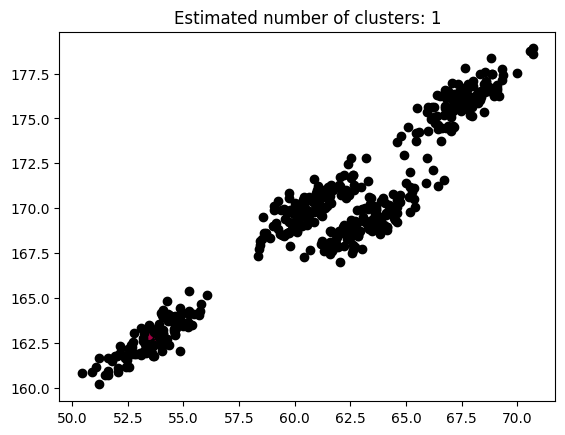

In [44]:
plotClusters(model4)

#### Inference:
1. The min_sample is too high, so it is not possible to create core points

---

## Model 5
### epsilon = 0.3 ; min_samples 7

In [45]:
model5 = DBSCAN(eps=0.3, min_samples=7).fit(df_np)

Number of Clusters =  12
Number of Outliers =  257


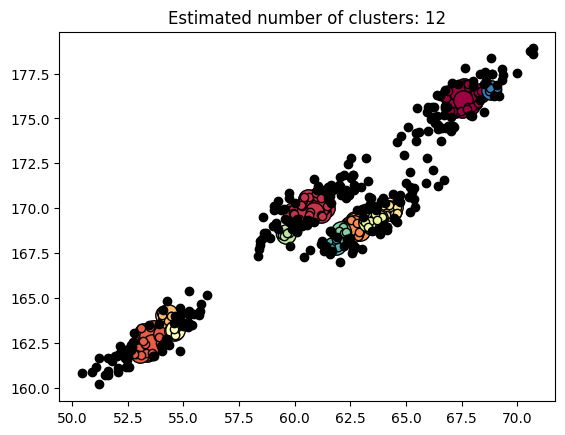

In [46]:
plotClusters(model5)

#### Inference:
1. Same as Model 3.

---

## Model 6
### epsilon = 0.3 ; min_samples = 10 ; mertic = varied

Number of Clusters =  4
Number of Outliers =  52


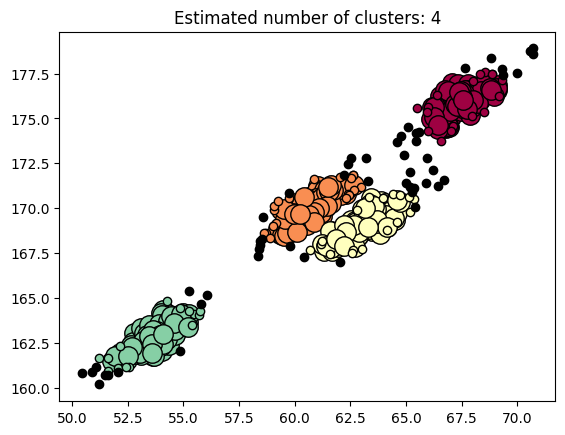

In [89]:
model6 = DBSCAN(eps=0.8,min_samples=10, metric='manhattan').fit(df_np)
plotClusters(model6)

---

### Test Block

Number of Clusters =  16
Number of Outliers =  169


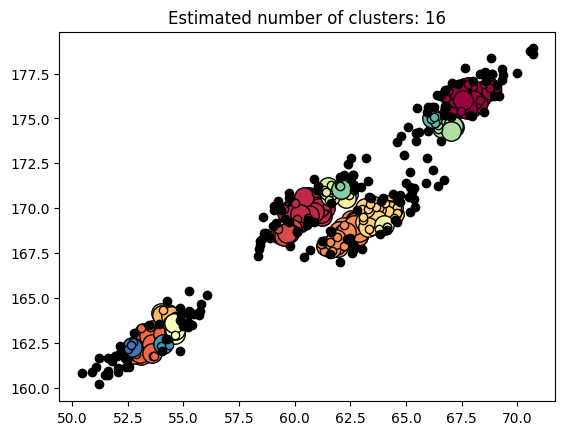

In [68]:
modeltb = DBSCAN(eps=0.3, min_samples=5).fit(df_np)
plotClusters(modeltb)

# HDBSCAN

In [91]:
from sklearn.cluster import HDBSCAN